In [1]:
#参考文档：http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.datasets import fetch_olivetti_faces    #sklearn中自带很多演示数据。
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt                      #python 绘图工具包。
import warnings
warnings.filterwarnings('ignore')
#提供内嵌绘图，不用反复的写plt.show()函数
%matplotlib inline                                  

In [2]:
#下载 Olivetti faces dataset
faces = fetch_olivetti_faces()
#检查数据格式
print("Data shape:{}".format(faces.data.shape))
print("Target shape:{}".format(faces.target.shape))

Data shape:(400, 4096)
Target shape:(400,)


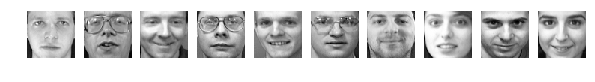

In [3]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ax = plt.subplot2grid((1,10),(0,i))
    ax.imshow(faces.data[i*10].reshape(64,64),cmap=plt.cm.gray)
    ax.axis("off")#隐藏坐标轴

In [4]:
#n_components ：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n。不指定是原样保留。
pca = PCA()
pca.fit(faces.data)
#pca对象包含的属性：
# components_ ：返回具有最大方差的成分。
# explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
# n_components_：返回所保留的成分个数n。
print(pca.n_components_)
print(pca.components_.shape)

4096
(400, 4096)


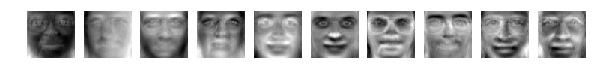

In [5]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ax = plt.subplot2grid((1,10),(0,i))
    ax.imshow(pca.components_[i].reshape(64,64),cmap=plt.cm.gray)
    ax.axis("off")#隐藏坐标轴

In [6]:
from skimage.io import imsave
#Step1 transform the face into the latent space.
face = faces.data[0]
#print(face.reshape(1,-1).shape)    # 1X4096
trans = pca.transform(face.reshape(1, -1))#(1,4096)-->(1,400)每个成分所占比例
for k in range(400):
    rank_k_approx = trans[:, :k].dot(pca.components_[:k])+pca.mean_
    imsave('{:>03}'.format(str(k)) + '.jpg', rank_k_approx.reshape(64, 64))

In [7]:
#创建GIF图像
import imageio
import os
import os.path
import glob
images  = glob.glob("./*.jpg")
all_image = []
for image in images:
    all_image.append(imageio.imread(image))
imageio.mimsave("001.gif",all_image,'GIF',duration = 0.06)